In [1]:
import matplotlib.pyplot as plt
import numpy as np

import datetime
import os
import time
import glob 

from sklearn.decomposition import PCA
from math import ceil

out_train_data_dir = '/home/juanp.montoya/NeuralNetworks/Final_Project/final-project-landandbuildingsatimg-ccny/data/processed/Cropped_60/train'
out_val_data_dir = '/home/juanp.montoya/NeuralNetworks/Final_Project/final-project-landandbuildingsatimg-ccny/data/processed/Cropped_60/val'


In [4]:
ss = glob.glob(out_train_data_dir+'/masks/*')
np.load(ss[0]).shape

(60, 512, 512, 1)

In [2]:
def read_img(img_path, size):
    image = np.zeros(([size, 60, 512, 512, 1]))
    for i in range(len(img_path[0:size])):
        im = np.load(img_path[i])
        for j in range(im.shape[0]):
            img_ts = im[j,:,:,0]
            img_ts = [img_ts.ravel()]
            try:
                # concatenate different images
                full_mat = np.concatenate((full_mat, img_ts))
            except UnboundLocalError: 
                # if not assigned yet, assign one
                full_mat = img_ts
    return full_mat

In [10]:
X = read_img(ss, 10)

In [11]:
X.shape

(600, 262144)

In [18]:

def eigenimages(full_mat, title, n_comp = 0.7, size = (512, 512)):
    # fit PCA to describe n_comp * variability in the class
    pca = PCA(n_components = n_comp, whiten = True)
    pca.fit(full_mat)
    print('Number of PC: ', pca.n_components_)
    return pca
  
def plot_pca(pca, size = (512, 512)):
    # plot eigenimages in a grid
    n = pca.n_components_
    fig = plt.figure(figsize=(8, 8))
    r = int(n**.5)
    c = ceil(n/ r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
        r = ax.imshow(pca.components_[i].reshape(size), 
                  cmap='Greys_r')
        cbar = fig.colorbar(r, ax = ax)
    plt.axis('off')
    plt.show()
    fig.savefig('PCA.png', dpi = 300)
    
# ei = eigenimages(X, 'PCA')

# plot_pca(eigenimages(pnemonia_images, 'PNEUMONIA'))

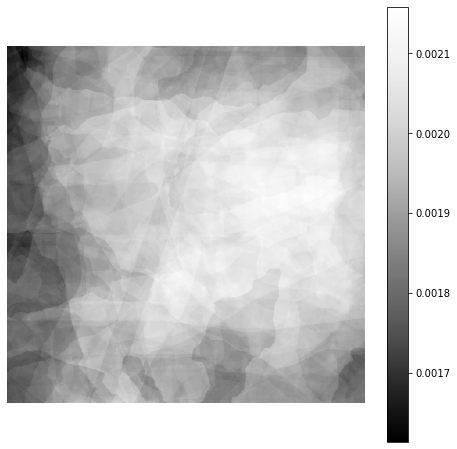

In [19]:
plot_pca(ei)
